In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("rbf_kernel.csv")

In [3]:
df

,X,Y,Class
0,0.437508,0.855777,0.0
1,-0.008673,0.103271,1.0
2,0.052562,0.024289,1.0
3,0.027243,0.220300,1.0
4,-0.044256,-0.161339,1.0
...,...,...,...
95,0.019123,-0.209408,1.0
96,-0.884409,0.154070,0.0
97,-0.104803,0.268765,1.0
98,0.245790,0.037345,1.0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
X

array([[ 0.4375078 ,  0.85577711],
       [-0.00867337,  0.10327097],
       [ 0.05256152,  0.02428873],
       [ 0.02724279,  0.22030004],
       [-0.04425649, -0.1613394 ],
       [-0.08940913,  1.07204856],
       [-1.06114694, -0.20295908],
       [-0.95613019,  0.41703954],
       [-0.29616233,  1.13387222],
       [-1.10159744,  0.19101063],
       [-0.02589453,  0.02661325],
       [-0.89581045, -0.69013715],
       [ 0.76007126,  0.83347523],
       [-0.19084271,  0.01169279],
       [ 0.78986675, -0.60043591],
       [ 0.24279742, -0.02176578],
       [-0.01117581,  0.05681597],
       [ 1.06489908,  0.30689474],
       [-0.01374908,  0.11721388],
       [-0.60503044, -0.84455566],
       [ 0.0549651 ,  0.05616654],
       [ 0.72864721,  0.6807347 ],
       [ 0.13965234, -0.05213694],
       [ 0.02977865, -0.0648523 ],
       [-0.06408232, -0.03302889],
       [-0.11065023,  0.09706486],
       [-0.76053193,  0.56604534],
       [-0.6518628 , -0.77157722],
       [ 0.04444846,

In [6]:
y

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.])

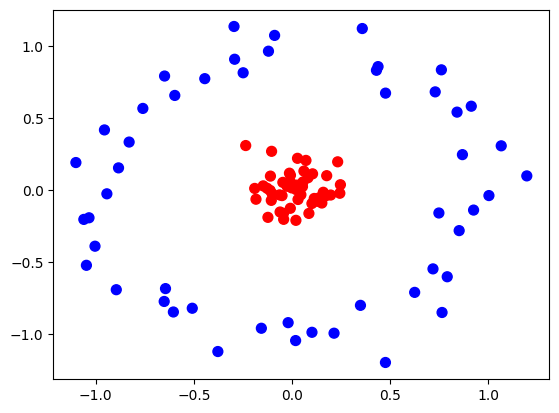

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

In [11]:
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
    X1, X2 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

    pred = clf.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = pred.reshape(X1.shape)

    plt.contourf(X1, X2, Z,
                alpha = 0.75,
                cmap = zero_one_colourmap)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1],
                c = (zero_one_colourmap)(i), label = j)

    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

<ipython-input-11-774d6d3728ab>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j, 0], X[y == j, 1],


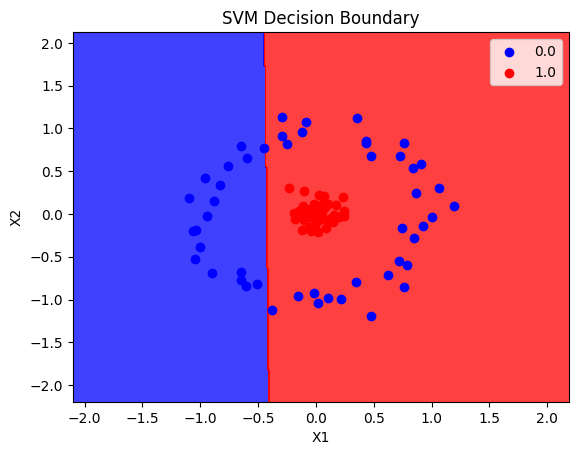

In [12]:
plot_decision_boundary(X, y, classifier)

In [13]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

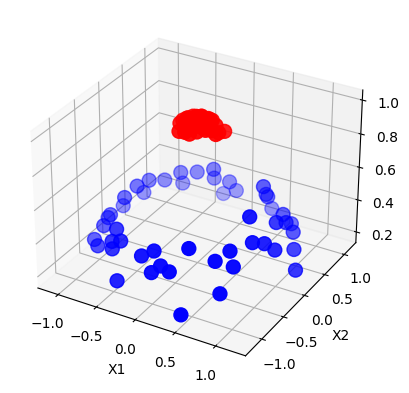

In [14]:
plot_3d_plot(X,y)

In [15]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-11-774d6d3728ab>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j, 0], X[y == j, 1],


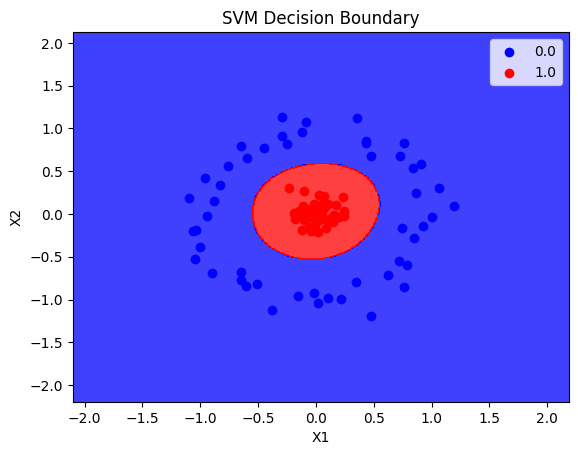

In [17]:
plot_decision_boundary(X, y, rbf_classifier)

In [18]:
def get_rbf_data(X):
    r = np.exp(-(X ** 2).sum(1))
    r = r.reshape(-1, 1)
    return np.concatenate([X, r], axis=1)

In [19]:
X_rbf = get_rbf_data(X)
X_rbf

array([[ 0.4375078 ,  0.85577711,  0.39702043],
       [-0.00867337,  0.10327097,  0.98931735],
       [ 0.05256152,  0.02428873,  0.99665296],
       [ 0.02724279,  0.22030004,  0.95192   ],
       [-0.04425649, -0.1613394 ,  0.97239902],
       [-0.08940913,  1.07204856,  0.31433936],
       [-1.06114694, -0.20295908,  0.31122934],
       [-0.95613019,  0.41703954,  0.33685358],
       [-0.29616233,  1.13387222,  0.25324995],
       [-1.10159744,  0.19101063,  0.28650423],
       [-0.02589453,  0.02661325,  0.99862216],
       [-0.89581045, -0.69013715,  0.27838071],
       [ 0.76007126,  0.83347523,  0.28016144],
       [-0.19084271,  0.01169279,  0.9641025 ],
       [ 0.78986675, -0.60043591,  0.37365858],
       [ 0.24279742, -0.02176578,  0.94230683],
       [-0.01117581,  0.05681597,  0.99665266],
       [ 1.06489908,  0.30689474,  0.29282081],
       [-0.01374908,  0.11721388,  0.98616842],
       [-0.60503044, -0.84455566,  0.33982106],
       [ 0.0549651 ,  0.05616654,  0.993

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_rbf, y, test_size = 0.20)

In [21]:
classifier_2 = SVC(kernel="linear")
classifier_2.fit(X_train_2, y_train_2.ravel())
y_pred_2 = classifier_2.predict(X_test_2)

In [22]:
accuracy_score(y_test_2, y_pred_2)

1.0

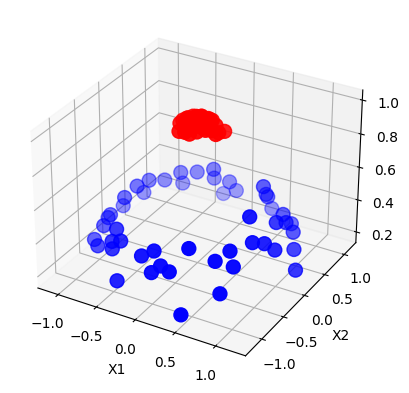

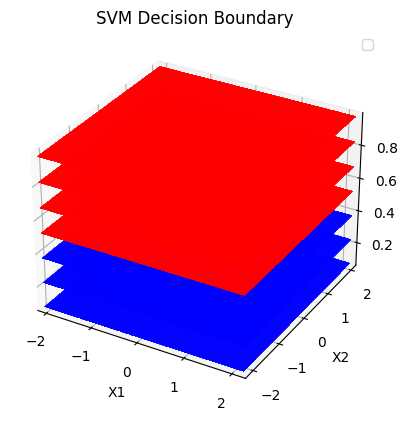

In [23]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_decision_boundary(X, y, clf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X1, X2, X3 = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                             np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01),
                             np.arange(X[:, 2].min() - 1, X[:, 2].max() + 1, 0.01))

    X_new = np.c_[X1.ravel(), X2.ravel(), X3.ravel()]
    Z = clf.predict(X_new)
    Z = Z.reshape(X1.shape)


    X1 = X1.reshape((X1.shape[0], -1))
    X2 = X2.reshape((X2.shape[0], -1))
    Z = Z.reshape((Z.shape[0], -1))

    plt.contourf(X1, X2, Z,
                alpha = 0.75,
                cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

plot_3d_plot(X,y)
plot_3d_decision_boundary(X_rbf, y, classifier_2)